In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prettytable

# Load csv file
df = pd.read_csv("help_center_traffic.csv")

# Display the first few rows of the dataset
df.head()

,day,country,browser,sessions,sessions_with_cases
0,1,A,Chrome,216,10
1,1,A,Firefox,66,3
2,1,A,Safari,31,1
3,1,A,Edge,17,0
4,1,A,Arc,19,0


In [2]:
# Substitute "Help Center escalation rate" as "escalation rate"
# Group by day and sum the relevant columns
daily_data = df.groupby('day')[['sessions_with_cases', 'sessions']].sum()

# Calculate the daily escalation rate
daily_data['daily_escalation_rate'] = daily_data['sessions_with_cases'] / daily_data['sessions']

# Display the result
daily_data

#Show first few rows
daily_data.head()

,sessions_with_cases,sessions,daily_escalation_rate
day,,,
1,1160,15893,0.072988
2,1200,16303,0.073606
3,1238,16713,0.074074
4,1277,17123,0.074578
5,1317,17533,0.075115


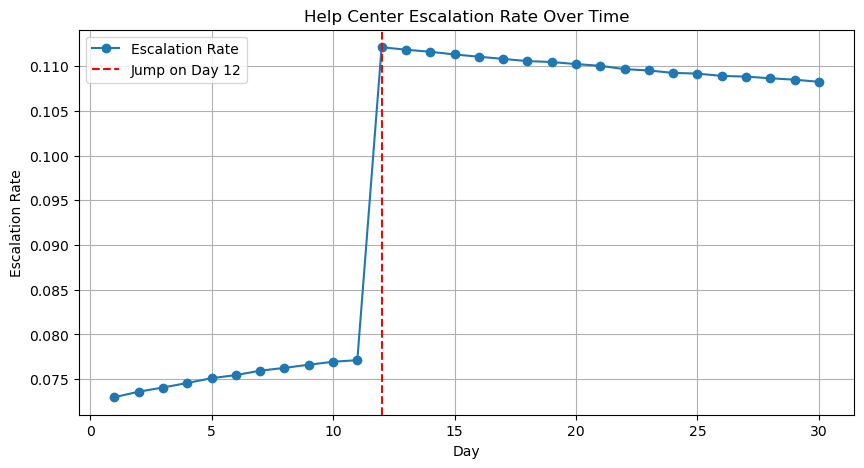

In [3]:
# Plot escalation rate over time
plt.figure(figsize=(10, 5))
plt.plot(daily_data.index, daily_data['daily_escalation_rate'], marker='o', linestyle='-', label="Escalation Rate")

# Highlight day 12
plt.axvline(x=12, color='red', linestyle='--', label="Jump on Day 12")

# Labels and title
plt.xlabel("Day")
plt.ylabel("Escalation Rate")
plt.title("Help Center Escalation Rate Over Time")
plt.legend()
plt.grid(True)

# Show plot
plt.show()



The plot above visualizes the escalation rate over time, with a noticeable jump on day 12. Now, I'll proceed to generate a breakdown of the escalation rate per day by country, creating a separate plot with different lines for each country. 

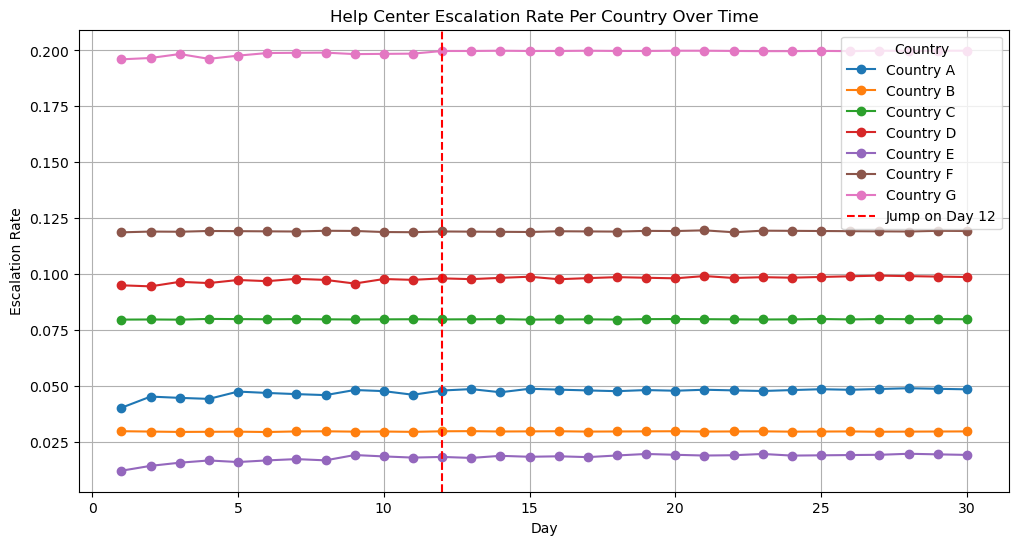

In [4]:
# Group by day and country, summing the relevant columns
country_data = df.groupby(['day', 'country'])[['sessions_with_cases', 'sessions']].sum().reset_index()

# Calculate escalation rate per day, per country
country_data['escalation_rate'] = country_data['sessions_with_cases'] / country_data['sessions']

# Pivot for plotting
pivot_data = country_data.pivot(index='day', columns='country', values='escalation_rate')

# Plot escalation rate per country over time
plt.figure(figsize=(12, 6))
for country in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[country], marker='o', linestyle='-', label=f"Country {country}")

# Highlight day 12
plt.axvline(x=12, color='red', linestyle='--', label="Jump on Day 12")

# Labels and title
plt.xlabel("Day")
plt.ylabel("Escalation Rate")
plt.title("Help Center Escalation Rate Per Country Over Time")
plt.legend(title="Country")
plt.grid(True)

# Show plot
plt.show()

The plot above shows the escalation rate per day for each country, with different lines representing different countries. The jump on day 12 is highlighted.

In [5]:
# Compute the proportion of sessions for each country per day
country_data['session_proportion'] = country_data['sessions'] / country_data.groupby('day')['sessions'].transform('sum')

# Shift the data to get the previous day's values
country_data['prev_escalation_rate'] = country_data.groupby('country')['escalation_rate'].shift(1)
country_data['prev_session_proportion'] = country_data.groupby('country')['session_proportion'].shift(1)

# Calculate the rate effect
country_data['rate_effect'] = country_data['prev_session_proportion'] * (country_data['escalation_rate'] - country_data['prev_escalation_rate'])

# Calculate the proportion effect
country_data['proportion_effect'] = (country_data['session_proportion'] - country_data['prev_session_proportion']) * country_data['prev_escalation_rate']

# Calculate total change
country_data['total_change'] = country_data['rate_effect'] + country_data['proportion_effect']

# Select and show only newly created columns
cols_to_show = [
    'day', 'country', 
    'session_proportion', 'prev_escalation_rate', 'prev_session_proportion',
    'rate_effect', 'proportion_effect', 'total_change'
]

country_data[cols_to_show]

# Display result with title
country_data[cols_to_show].style.set_caption("Escalation Rate Decomposition")

,day,country,session_proportion,prev_escalation_rate,prev_session_proportion,rate_effect,proportion_effect,total_change
0,1,A,0.021959,nan,nan,nan,nan,nan
1,1,B,0.288869,nan,nan,nan,nan,nan
2,1,C,0.466558,nan,nan,nan,nan,nan
3,1,D,0.018562,nan,nan,nan,nan,nan
4,1,E,0.021078,nan,nan,nan,nan,nan
5,1,F,0.147990,nan,nan,nan,nan,nan
6,1,G,0.034984,nan,nan,nan,nan,nan
7,2,A,0.024474,0.040115,0.021959,0.000110,0.000101,0.000211
8,2,B,0.283138,0.029623,0.288869,-0.000046,-0.000170,-0.000216
9,2,C,0.459118,0.079568,0.466558,0.000027,-0.000592,-0.000565


Above is the Kitagawa-Oaxaca-Blinder decomposition, breaking down the change in escalation rate into rate effect and proportion effects per country.

In [6]:
# Group by day, country, and browser, summing the relevant columns
browser_data = df.groupby(['day', 'country', 'browser'])[['sessions_with_cases', 'sessions']].sum().reset_index()

# Calculate escalation rate per day, per country, per browser
browser_data['escalation_rate'] = browser_data['sessions_with_cases'] / browser_data['sessions']

# Compute the proportion of sessions for each browser per day
browser_data['session_proportion'] = browser_data['sessions'] / browser_data.groupby('day')['sessions'].transform('sum')

# Shift the data to get the previous day's values
browser_data['prev_escalation_rate'] = browser_data.groupby(['country', 'browser'])['escalation_rate'].shift(1)
browser_data['prev_session_proportion'] = browser_data.groupby(['country', 'browser'])['session_proportion'].shift(1)

# Calculate the rate effect
browser_data['rate_effect'] = browser_data['prev_session_proportion'] * (browser_data['escalation_rate'] - browser_data['prev_escalation_rate'])

# Calculate the proportion effect
browser_data['proportion_effect'] = (browser_data['session_proportion'] - browser_data['prev_session_proportion']) * browser_data['prev_escalation_rate']

# Calculate total change
browser_data['total_change'] = browser_data['rate_effect'] + browser_data['proportion_effect']

# Display result
browser_data.style.set_caption("Extended Escalation Rate Decomposition (Country & Browser)")

pd.set_option('display.max_rows', 1000)     
pd.set_option('display.max_columns', 50)   

# Then display
display(browser_data)

,day,country,browser,sessions_with_cases,sessions,escalation_rate,session_proportion,prev_escalation_rate,prev_session_proportion,rate_effect,proportion_effect,total_change
0,1,A,Arc,0,19,0.000000,0.001195,NaN,NaN,NaN,NaN,NaN
1,1,A,Chrome,10,216,0.046296,0.013591,NaN,NaN,NaN,NaN,NaN
2,1,A,Edge,0,17,0.000000,0.001070,NaN,NaN,NaN,NaN,NaN
3,1,A,Firefox,3,66,0.045455,0.004153,NaN,NaN,NaN,NaN,NaN
4,1,A,Safari,1,31,0.032258,0.001951,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1045,30,G,Arc,137,685,0.200000,0.019143,0.199143,0.013202,1.130806e-05,0.001183,0.001194
1046,30,G,Chrome,1338,6691,0.199970,0.186988,0.199971,0.197495,-2.492809e-07,-0.002101,-0.002101
1047,30,G,Edge,113,565,0.200000,0.015790,0.199367,0.017867,1.130806e-05,-0.000414,-0.000403
1048,30,G,Firefox,506,2533,0.199763,0.070788,0.199906,0.060385,-8.649572e-06,0.002080,0.002071


Extended the decomposition analysis to include the browser, breaking down the change in escalation rate by both country and browser. Analysis above.